<a href="https://colab.research.google.com/github/mojtaba732/ML_Practice/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


**Entropy** vs **Gini** vs **Error**

In [ ]:
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def gini(p):
  return p*(1 - p) + (1 - p)*(1 - (1-p))

def error(p):
  return 1 - np.max([p, 1 - p])


In [ ]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

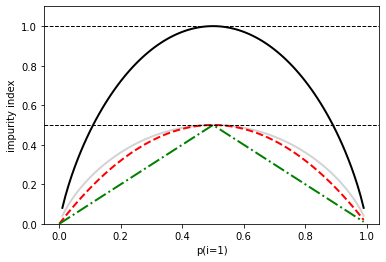

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],['Entropy', 'Entropy (scaled)','Gini impurity','Misclassification error'],['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab,linestyle=ls, lw=2, color=c)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

In [10]:
def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=f'Class {cl}',edgecolor='black')
    if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1],c='none', edgecolor='black', alpha=1.0,linewidth=1, marker='o',s=100, label='Test set')

In [11]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)
#X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
X_combined = np.vstack((X_train, X_test))

In [12]:
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

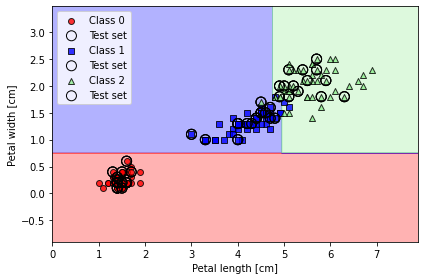

In [14]:
plot_decision_regions(X_combined,y_combined,classifier=tree_model,test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

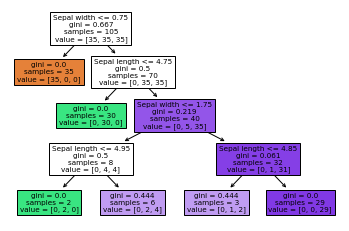

In [17]:
feature_names = ['Sepal length', 'Sepal width','Petal length', 'Petal width']
tree.plot_tree(tree_model,feature_names=feature_names, filled=True)
plt.show()